In [1]:
# Download BLIP and Phi2 and save it to ./models, it should take a while

from transformers import BlipProcessor, BlipForConditionalGeneration, AutoTokenizer, AutoModelForCausalLM

BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base", cache_dir="./models/blip")
BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", cache_dir="./models/blip")

tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", cache_dir="./models/phi-2")
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", cache_dir="./models/phi-2")

2025-04-30 19:22:40.413917: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 19:22:40.525629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 19:22:40.623415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746015760.741487   64041 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746015760.777472   64041 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 19:22:40.995288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

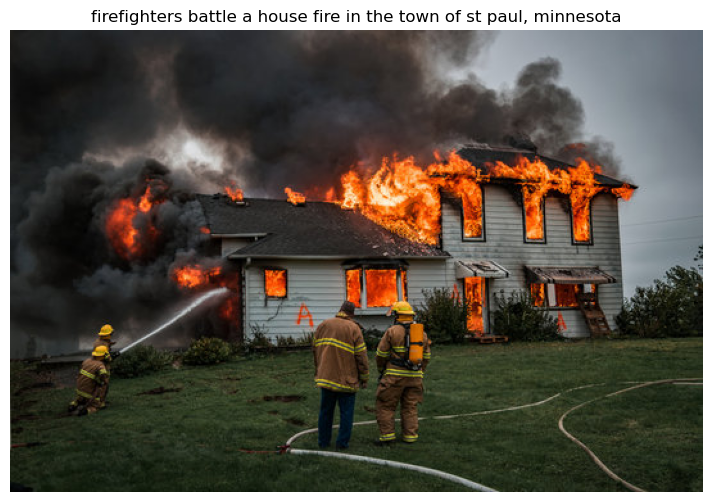

Caption: firefighters battle a house fire in the town of st paul, minnesota


In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
import cv2
import torch
from PIL import Image
import numpy as np
from transformers.utils import logging

logging.set_verbosity_error()

processor = BlipProcessor.from_pretrained("./models/blip/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b")
model = BlipForConditionalGeneration.from_pretrained("./models/blip/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b")

bgr_image = cv2.imread("test_image.jpg", cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)


pil_image = Image.fromarray(rgb_image)
inputs = processor(pil_image, return_tensors="pt")
with torch.no_grad():
    output = model.generate(**inputs)

caption = processor.decode(output[0], skip_special_tokens=True)

# Display image with caption
plt.figure(figsize=(10, 6))
plt.imshow(rgb_image)
plt.axis("off")
plt.title(caption)
plt.show()

print("Caption:", caption)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load from local directory
local_path = "./models/phi-2/models--microsoft--phi-2/snapshots/ef382358ec9e382308935a992d908de099b64c23"

tokenizer = AutoTokenizer.from_pretrained(local_path)
model = AutoModelForCausalLM.from_pretrained(local_path)

# Few-shot prompt
prompt = """
    You are an emergency advisor. Classify the fire situation and give brief advice.

    Example 1:
    Caption: A person is lighting a matchstick.
    Response: 🔵 Harmless. No action needed.

    Example 2:
    Caption: Flames are rising from a pile of trash on the sidewalk.
    Response: 🔴 Dangerous. Call emergency services immediately.

    Example 3:
    Caption: A campfire is burning at night with people around it.
    Response: 🟡 Controlled. Monitor closely.

    Caption: 
""" + caption + "\nResponse:"

# Generate response
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=50)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Extract only the new generated part
print("LLM Response:", response.split("Response:")[-1].strip())


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]